<a href="https://colab.research.google.com/github/prinsha13/6CS012_Worksheet/blob/main/6CS012_Worksheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement an End to End CNN Model for Image Classification Task.

##Task 1: Data Understanding and Visualization:

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load and visualize images from a dataset stored in directories, where each subdirectory represents a class.

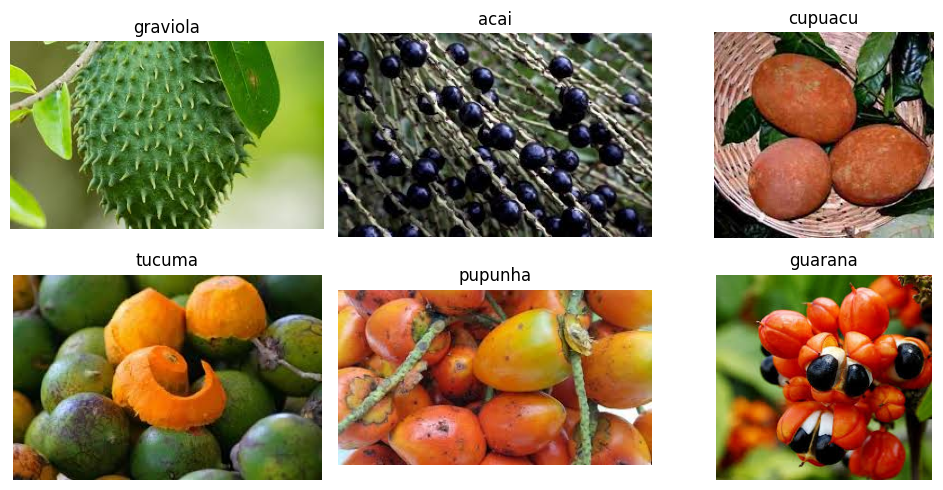

In [39]:
#Necessary Imports
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the train directory path
train_dir = '/content/drive/MyDrive/AI and DL/Week-05/dataset/train'

# Get the list of class directories
class_directories = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one image randomly from each class
selected_images = []
for class_dir in class_directories:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    if image_files: #Ensure that there is at least one image
        selected_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, selected_image))
# Check if we have images to display
if not images:
    raise ValueError("No images found in the dataset!")

# Display the images in a grid format with two rows
plt.figure(figsize=(10, 5))
for i, image_path in enumerate(selected_images, 1):
    plt.subplot(2, (len(selected_images) + 1) // 2, i)
    plt.imshow(imread(image_path))
    plt.title(os.path.basename(os.path.dirname(image_path)))
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Check for corrupted output:

In [40]:
import os
from PIL import Image

# Define the path to the training dataset
train_dir = '/content/drive/MyDrive/AI and DL/Week-05/dataset/train'

# List all class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

corrupted_images = []  # List to store corrupted image paths

# Iterate through each class subdirectory
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    # List all image files in the directory
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image in images:
        image_path = os.path.join(class_path, image)

        try:
            with Image.open(image_path) as img:
                img.verify()

        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)
            print(f"Removed corrupted image: {image_path}")

# Final report
if not corrupted_images:
    print("No Corrupted Images Found.")

No Corrupted Images Found.


##Task 2: Loading and Preprocessing Image Data in keras:

In [41]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=False,
  validation_split=validation_split,
  subset="validation",
  seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


##Implemetation of CNN

Convolutional Architecture:

• Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

• Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

• Activation Layer: ReLU activation

• Pooling Layer 2: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [42]:
import numpy as np

# If using tf.data.Dataset
unique_labels = set()
for _, labels in train_ds:
    unique_labels.update(np.unique(labels.numpy()))
print("Unique labels:", unique_labels)
print("Number of classes:", len(unique_labels))

Unique labels: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
Number of classes: 6


In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = keras.Sequential([
        # Convolutional Layer 1
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Convolutional Layer 2
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),

        # Flatten layer
        layers.Flatten(),

        # Fully Connected Layers
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),

        # Output Layer (Softmax for multi-class classification)
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Define parameters
input_shape = (128, 128, 3)  # Example input shape (128x128 RGB images)
num_classes = 6  # Adjust based on dataset

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model
Model Compilation

In [44]:
# Compile the model using Adam optimizer
model.compile(
    optimizer="adam",  # Adam optimizer
    loss="sparse_categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Evaluate model performance
)

print("Model compiled successfully!")

Model compiled successfully!


# Task 4: Train the Model
###Model Training

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
# Callbacks
#ModelCheckpoint
checkpoint = ModelCheckpoint(
    "best_model.h5",  # Save the best model based on validation accuracy
    monitor="val_accuracy",  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode="max",  # We want to maximize validation accuracy
    verbose=1
)
#EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore the best model weights after stopping
    verbose=1
)

# Combine callbacks
callbacks = [checkpoint, early_stopping]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.2054 - loss: 1.8820
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 648ms/step - accuracy: 0.2027 - loss: 1.9010 - val_accuracy: 0.8333 - val_loss: 1.2340
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.3038 - loss: 1.7087
Epoch 2: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.3112 - loss: 1.7016 - val_accuracy: 0.0000e+00 - val_loss: 2.0092
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4086 - loss: 1.5708
Epoch 3: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 519ms/step - accuracy: 0.4175 - loss: 1.5653 - val_accuracy: 0.1111 - val_loss: 2.0125
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5394 - loss: 1.3419
Epoch 4: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.5434 - loss: 1.3298 - val_accuracy: 0.2222 - val_loss: 1.5620
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.6834 - loss: 0.9912
Epoch 5: val_accuracy did not improve from 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.8160 - loss: 0.4361 - val_accuracy: 0.8889 - val_loss: 0.4743
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.9300 - loss: 0.3234
Epoch 9: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 0.9301 - loss: 0.3203 - val_accuracy: 0.8889 - val_loss: 0.7223
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 1.0000 - loss: 0.1939
Epoch 10: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 1.0000 - loss: 0.1950 - val_accuracy: 0.7778 - val_loss: 0.7257
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.9699 - loss: 0.1539
Epoch 11: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.9705 - loss: 0.1522 - val_accuracy: 0.8889 - val_loss: 0.3956
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 1.0000 - loss: 0.0609
Epoch 12: val_accuracy did not improve fro

##Task 5: Evaluate the Model
###Model Evaluation

In [46]:
# Evaluate the model on the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/AI and DL/Week-05/dataset/test',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=batch_size
)

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6667 - loss: 114.5142
Test Loss: 114.51424407958984
Test Accuracy: 0.6666666865348816


## Task 6: Save and Load the Model
###Model Saving and Loading

In [47]:
model.save('finalfruitdetection.h5')
loaded_model = tf.keras.models.load_model('finalfruitdetection.h5')

In [48]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step - accuracy: 0.6667 - loss: 114.5142
Test Accuracy: 0.6667


In [49]:
# Re-evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds)
print(f"Loaded Model - Test Loss: {test_loss}")
print(f"Loaded Model - Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.6667 - loss: 114.5142
Loaded Model - Test Loss: 114.51424407958984
Loaded Model - Test Accuracy: 0.6666666865348816


# Task 7: Predictions and Classification Report
###Making Predictions


In [50]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test dataset
predictions = model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert the true labels into a numpy array
true_labels = np.array(true_labels)

# Print the classification report
print(classification_report(true_labels, predicted_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.09      0.20      0.12         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         5

    accuracy                           0.10        30
   macro avg       0.08      0.10      0.09        30
weighted avg       0.08      0.10      0.09        30



In [56]:
import os
# List files in the current directory
print(os.listdir())

['.config', '.ipynb_checkpoints', 'best_model.h5', 'finalfruitdetection.h5', 'drive', 'sample_data']


In [57]:
import shutil

#Move the model to a new directory
shutil.move("/content/finalfruitdetection.h5","/content/drive/MyDrive/AI and DL/Week-05")

'/content/drive/MyDrive/AI and DL/Week-05/finalfruitdetection.h5'